## Alternus Vera - Mojdeh Keykhanzadeh

Link to shared group notebook :https://colab.research.google.com/drive/1bOoY6V0ytxSigKuZ6lJntNWJJcTM_6wU#scrollTo=wflDgVH289N1
My new work for final csv deliverable : https://colab.research.google.com/drive/1K3xE-RGD_vW5DDeoTevi-PshlS-dKU2-#scrollTo=wAQ_0ZbUoA4W




#Introduction / Definition 
I focused on two  factors this week ,  Sensationalism and Context consistency 

Sensationalism - the use of exciting or shocking language to provoke public interest is being analyzed (a range between 0 to 10 with 10 being most sensational )
Context consistency - consistency between topic and statemnets ( a range between 0 to 10 with 10 being most consistent in topic nad statement )

#Preliminary preparation and cleansing 
Using the work done by the team from last week specifically around distillation and leveraging to the needs of the topics covered here 





In [0]:
# dependencies
import pandas as pd
import nltk

# download nltk stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import pandas as pd
import io
import requests


def get_parsed_data(url):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep='\t', header=None)

def get_parsed_data2(url):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep=',', header='infer')


columns_politifacts = [
  'id',
  'label',
  'statement',
  'subject',
  'speaker',
  'speakers_job_title',
  'state_info',
  'party_affiliation',
  'barely_true',
  'false',
  'half_true',
  'mostly_true',
  'pants_on_fire',
  'context',
]


# download and parse the dataset...
data_poli_test  = get_parsed_data('https://raw.githubusercontent.com/synle/machine-learning-sample-dataset/master/liar_dataset/test.tsv')
data_poli_train = get_parsed_data('https://raw.githubusercontent.com/synle/machine-learning-sample-dataset/master/liar_dataset/train.tsv')
data_poli_valid = get_parsed_data('https://raw.githubusercontent.com/synle/machine-learning-sample-dataset/master/liar_dataset/valid.tsv')
data_kg_fake_news = get_parsed_data2('https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle/kaggle-fake.csv')

# parsed the columns
data_poli_test.columns  = columns_politifacts
data_poli_train.columns = columns_politifacts
data_poli_valid.columns = columns_politifacts

In [0]:
data_kg_fake_news.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


#Distillation 

In [0]:
# tokenize the word
import re

def tokenize(text):
    tokens = re.split('\W+', str(text).lower())
    return tokens
data_kg_fake_news ['title_clean_tokenize']=data_kg_fake_news ['title'] .apply(tokenize)
data_kg_fake_news ['text_clean_tokenize'] =data_kg_fake_news ['text'] .apply(tokenize)
data_poli_test ['subject_clean_tokenize'] = data_poli_test ['subject'].apply(tokenize)
data_poli_test ['statement_clean_tokenize']=data_poli_test ['statement'].apply(tokenize)
data_poli_train ['subject_clean_tokenize'] = data_poli_train['subject'].apply(tokenize)
data_poli_train ['statement_clean_tokenize']=data_poli_train ['statement'].apply(tokenize)
data_kg_fake_news.head(3)
#data_poli_test.head(3)


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,title_clean_tokenize,text_clean_tokenize
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,"[muslims, busted, they, stole, millions, in, g...","[print, they, should, pay, all, the, back, all..."
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,"[re, why, did, attorney, general, loretta, lyn...","[why, did, attorney, general, loretta, lynch, ..."
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,"[breaking, weiner, cooperating, with, fbi, on,...","[red, state, fox, news, sunday, reported, this..."


In [0]:
data_poli_test.statement_clean_tokenize[0][:10]

['building', 'a', 'wall', 'on', 'the', 'u', 's', 'mexico', 'border', 'will']

In [0]:
#Lemmantizing 
import nltk


wn = nltk.WordNetLemmatizer()
def lemmatize(tokenized_words):
  text = [wn.lemmatize(word) for word in tokenized_words]
  return text
data_kg_fake_news ['text_clean_tokenize'] = data_kg_fake_news ['text_clean_tokenize'] .apply(lemmatize)
data_poli_test ['statement_clean_tokenize'] = data_poli_test ['statement_clean_tokenize'].apply(lemmatize)
data_poli_train ['statement_clean_tokenize'] = data_poli_train ['statement_clean_tokenize'].apply(lemmatize)
data_kg_fake_news ['title_clean_tokenize'] = data_kg_fake_news ['title_clean_tokenize'] .apply(lemmatize)
data_poli_test ['subject_clean_tokenize'] = data_poli_test ['subject_clean_tokenize'].apply(lemmatize)
data_poli_train ['subject_clean_tokenize'] = data_poli_train ['subject_clean_tokenize'].apply(lemmatize)
data_kg_fake_news.text_clean_tokenize[0][:10]
#data_poli_test.head(3)

['print', 'they', 'should', 'pay', 'all', 'the', 'back', 'all', 'the', 'money']

In [0]:
#Remove stop words
from nltk.corpus import stopwords
from string import punctuation

english_stopwords = set(stopwords.words('english') + list(punctuation) + [''])
def remove_stopwords(tokenized_words):
  text = [word for word in tokenized_words if word not in english_stopwords]
  return text 
  
data_kg_fake_news ['text_clean_tokenize'] =  data_kg_fake_news ['text_clean_tokenize'].apply(remove_stopwords)
data_poli_test ['statement_clean_tokenize'] = data_poli_test ['statement_clean_tokenize'].apply(remove_stopwords)
data_poli_train ['statement_clean_tokenize'] = data_poli_train ['statement_clean_tokenize'].apply(remove_stopwords)
data_kg_fake_news ['title_clean_tokenize'] =  data_kg_fake_news ['title_clean_tokenize'].apply(remove_stopwords)
data_poli_test ['subject_clean_tokenize'] = data_poli_test ['subject_clean_tokenize'].apply(remove_stopwords)
data_poli_train ['subject_clean_tokenize'] = data_poli_train ['subject_clean_tokenize'].apply(remove_stopwords)
#data_poli_test.statement_clean_tokenize[0][:10]
data_kg_fake_news.text_clean_tokenize[0][:10]


['print',
 'pay',
 'back',
 'money',
 'plus',
 'interest',
 'entire',
 'family',
 'everyone',
 'came']

In [0]:
#Remove Punctuation
import string

def remove_punctuation(tokenized_words):
    table = str.maketrans('', '', string.punctuation)
    text = [w.translate(table) for w in tokenized_words]
    return text 
  
data_kg_fake_news ['text_clean_tokenize'] =  data_kg_fake_news ['text_clean_tokenize'].apply(remove_punctuation)
data_poli_test ['statement_clean_tokenize'] = data_poli_test ['statement_clean_tokenize'].apply(remove_punctuation)
data_poli_train ['statement_clean_tokenize'] = data_poli_train ['statement_clean_tokenize'].apply(remove_punctuation)
data_kg_fake_news ['title_clean_tokenize'] =  data_kg_fake_news ['title_clean_tokenize'].apply(remove_punctuation)
data_poli_test ['subject_clean_tokenize'] = data_poli_test ['subject_clean_tokenize'].apply(remove_punctuation)
data_poli_train ['subject_clean_tokenize'] = data_poli_train ['subject_clean_tokenize'].apply(remove_punctuation)
data_kg_fake_news.text_clean_tokenize[0][:10]


['print',
 'pay',
 'back',
 'money',
 'plus',
 'interest',
 'entire',
 'family',
 'everyone',
 'came']

# Sentiment Analysis : 

In this section , we identify and categorize author's opinion which is expressed in the text to find out author's feeling toward a particular topic . To achieve this , we used vader library to find the polarity score of sentences in each document . 

In [0]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
data_kg_fake_news['title_clean_concat'] = data_kg_fake_news.title_clean_tokenize.map(lambda x: " ".join(x))
data_kg_fake_news['text_clean_concat'] = data_kg_fake_news.text_clean_tokenize.map(lambda x: " ".join(x))
data_poli_test ['statement_clean_concat'] = data_poli_test.statement_clean_tokenize.map(lambda x: " ".join(x))
data_poli_train ['statement_clean_concat'] = data_poli_train.statement_clean_tokenize.map(lambda x: " ".join(x))


In [0]:
!pip install vaderSentiment


    100% |████████████████████████████████| 133kB 3.7MB/s 


Lets obtain polarity indices for sentences in given topics. First we look at titles and for analysis , I only look at first 10 titlles   to reduce computation 

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sid = SentimentIntensityAnalyzer()
sentences_kg = data_kg_fake_news['text_clean_concat']
sentences_kg_title = data_kg_fake_news['title_clean_concat']
sentences_poli_test  = data_poli_test ['statement_clean_concat']
sentences_poli_train = data_poli_train ['statement_clean_concat']
def sentiment_analyzer_scores(sentences):
                          
    for sentence in sentences[:10]:
      print(sentence)
      score = sid.polarity_scores(sentence)
      for key in sorted(score):
         print('{0}: {1}, '.format(key, score[key]), end='')
      print()

sentiment_analyzer_scores(sentences_kg_title)

muslim busted stole million gov benefit
compound: 0.4588, neg: 0.0, neu: 0.625, pos: 0.375, 
attorney general loretta lynch plead fifth
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
breaking weiner cooperating fbi hillary email investigation
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
pin drop speech father daughter kidnapped killed isi voted donald j trump 100percentfedup com
compound: -0.765, neg: 0.375, neu: 0.625, pos: 0.0, 
fantastic trump 7 point plan reform healthcare begin bombshell 100percentfedup com
compound: 0.5574, neg: 0.0, neu: 0.714, pos: 0.286, 
hillary go absolutely berserk protester rally video
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
breaking nypd ready make arrest weiner case hillary visited pedophile island least 6 time money laundering underage sex pay play proof inappropriate handling classified information 100percentfedup com
compound: 0.2732, neg: 0.124, neu: 0.717, pos: 0.16, 
wow whistleblower tell chilling story massive voter fraud trump campaign rea

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


as above shows for example , first author is more neutral based on the title. The sum of positive , negative and neutral scrore is equal to one. Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

In [0]:
sentiment_analyzer_scores(sentences_kg)

print pay back money plus interest entire family everyone came need deported asap take two year bust go another group stealing government taxpayer group somali stole four million government benefit 10 month reported numerous case like one muslim refugee immigrant commit fraud scamming system way control related
compound: 0.2023, neg: 0.149, neu: 0.671, pos: 0.18, 
attorney general loretta lynch plead fifth barracuda brigade 2016 10 28 print administration blocking congressional probe cash payment iran course need plead 5th either recall refuse answer plain deflects question straight corruption finest 100percentfedup com talk covering loretta lynch plead fifth avoid incriminating payment iran corrupt core attorney general loretta lynch declining comply investigation leading member congress obama administration secret effort send iran 1 7 billion cash earlier year prompting accusation lynch ha pleaded fifth amendment avoid incriminating payment according lawmaker communication exclusivel

In [0]:
sentiment_analyzer_scores(sentences_poli_test)

building wall u mexico border take literally year
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
wisconsin pace double number layoff year
compound: 0.0772, neg: 0.0, neu: 0.794, pos: 0.206, 
say john mccain ha done nothing help vet
compound: 0.0366, neg: 0.212, neu: 0.563, pos: 0.225, 
suzanne bonamici support plan cut choice medicare advantage senior
compound: 0.3818, neg: 0.164, neu: 0.469, pos: 0.367, 
asked reporter whether center criminal scheme violate campaign law gov scott walker nodded yes
compound: -0.5994, neg: 0.325, neu: 0.542, pos: 0.133, 
past five year federal government ha paid 601 million retirement disability benefit deceased former federal employee
compound: 0.6597, neg: 0.0, neu: 0.722, pos: 0.278, 
say tennessee law requires school receive half proceeds 31 million per year half cent increase shelby county sale tax
compound: 0.3182, neg: 0.0, neu: 0.887, pos: 0.113, 
say vice president joe biden admits american people scammed economic stimulus package
compound: 0.29

applying same analysis on liar lair dataset

In [0]:
sentiment_analyzer_scores(sentences_poli_train)

say annies list political group support third trimester abortion demand
compound: 0.296, neg: 0.123, neu: 0.656, pos: 0.221, 
decline coal start started natural gas took started begin president george w bush administration
compound: 0.3612, neg: 0.0, neu: 0.828, pos: 0.172, 
hillary clinton agrees john mccain voting give george bush benefit doubt iran
compound: 0.3182, neg: 0.153, neu: 0.552, pos: 0.294, 
health care reform legislation likely mandate free sex change surgery
compound: 0.7579, neg: 0.0, neu: 0.552, pos: 0.448, 
economic turnaround started end term
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
chicago bear starting quarterback last 10 year total number tenured uw faculty fired last two decade
compound: -0.5106, neg: 0.19, neu: 0.741, pos: 0.069, 
jim dunnam ha lived district represents year
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
person stage ha worked actively last year passing along rus feingold toughest ethic reform since watergate
compound: 0.5267, neg: 0.0

** Sentiment analysis 2 **
Lets do sentimnet analyisis in another way (classify sentences according to training set) 

In [0]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
#creating dictionary ,defining 3 classes : positive, negative and neutral
positive_vocab = [ 'wow','awesome', 'outstanding', 'fantastic', 'terrific', 'good',
                  'nice', 'great' ,'Thanks','winner']
negative_vocab = [ 'bad', 'terrible','useless','horrific','hate','fuck']
neutral_vocab = [ 'will','the','say','was','is','did','know','words','not','yes' ]

#using bag of words , convert word  to features 
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

#make train set , the sum of the 3 features
train_set = negative_features + positive_features + neutral_features

#train classifier
classifier = NaiveBayesClassifier.train(train_set)

# Predict
neg = 0
pos = 0
neu = 0


for word in sentences_kg:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
    if classResult == 'neu':
        neu = neu + 1
 
print('Positive: ' + str(float(pos)/len(sentences_kg)))
print('Negative: ' + str(float(neg)/len(sentences_kg)))
print('Neutral: ' + str(float(neu)/len(sentences_kg)))

Positive: 0.9656127394414955
Negative: 0.0343872605585045
Neutral: 0.0


In [0]:
!pip install wordcloud

## Visualizing 
Lets visualize the most frequent word in the text 

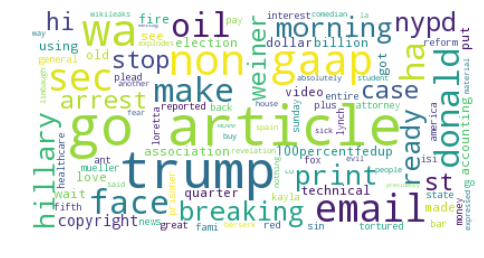

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(sentences_kg))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

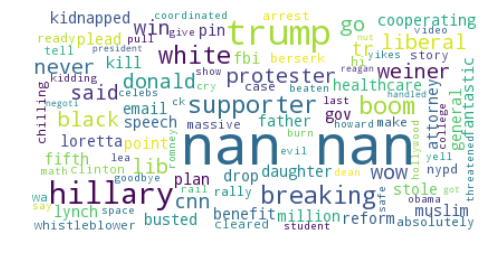

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(sentences_kg_title))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
!pip install -U gensim

    100% |████████████████████████████████| 23.6MB 1.6MB/s 
    100% |████████████████████████████████| 1.4MB 12.4MB/s 
    100% |████████████████████████████████| 133kB 28.6MB/s 
    100% |████████████████████████████████| 61kB 20.0MB/s 
    100% |████████████████████████████████| 4.9MB 5.7MB/s 
    100% |████████████████████████████████| 552kB 22.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


##Topic Modeling using Gensim
pick topics based on distribution over words . First, we are creating a dictionary from the data, then convert to bag-of-words corpus and save the dictionary and corpus for future use.



In [0]:
#creating a dictionary from the data, then convert to bag-of-words corpus and save the dictionary and corpus for future us
from gensim import corpora
dictionary = corpora.Dictionary(data_kg_fake_news ['text_clean_tokenize'])
corpus = [dictionary.doc2bow(text) for text in data_kg_fake_news ['text_clean_tokenize']]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')


In [0]:
#finding 5 topics in text
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.005*"com" + 0.004*"also" + 0.004*"ha" + 0.004*"health"')
(1, '0.011*"wa" + 0.008*"people" + 0.006*"one" + 0.005*"ha"')
(2, '0.032*"de" + 0.019*"la" + 0.012*"в" + 0.010*"en"')
(3, '0.013*"u" + 0.009*"ha" + 0.007*"war" + 0.007*"wa"')
(4, '0.019*"clinton" + 0.018*"trump" + 0.012*"hillary" + 0.011*"wa"')


In [0]:
dictionary = corpora.Dictionary(data_kg_fake_news ['title_clean_tokenize'])
corpus = [dictionary.doc2bow(text) for text in data_kg_fake_news ['title_clean_tokenize']]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [0]:
#finding 5 topics in title 
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.012*"trump" + 0.010*"world" + 0.005*"day" + 0.005*"new"')
(1, '0.014*"de" + 0.010*"la" + 0.008*"rock" + 0.007*"standing"')
(2, '0.040*"clinton" + 0.039*"hillary" + 0.030*"nan" + 0.027*"trump"')
(3, '0.015*"u" + 0.012*"russia" + 0.012*"war" + 0.006*"child"')
(4, '0.024*"trump" + 0.007*"new" + 0.007*"video" + 0.007*"black"')


Now find the cosine similarity between title and text 

In [0]:
import re, math
from collections import Counter
#inner product of 2 none zero vectors (dot product)
def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     return Counter(text)

vector1 = text_to_vector(sentences_kg)
vector2 = text_to_vector(sentences_kg_title)

cosine = get_cosine(vector1, vector2)

print('Cosine kaggle:', cosine)

Cosine kaggle: 0.2599341150869035


The above score is low but seems rational as title has less words than text 

#Work Cited
https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184

https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis

https://programminghistorian.org/en/lessons/sentiment-analysis
